In [40]:
#타이타닉 생존자 예측 모델링
#Feature Engineering

In [41]:
import pandas as pd
train = pd.read_csv('data/타이타닉/train.csv')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#상관관계(각 컬럼간)
before_corr = train.corr(numeric_only=True)
before_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [44]:
#null 값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
test = pd.read_csv('data/타이타닉/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [46]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pred             0
dtype: int64

In [47]:
#두 데이터 동시에 작업을 위해 묶기
data_list=[train, test]

In [48]:
#train data
data_list[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train['Sex'].head() #모델링-문자>숫자로 변환

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [50]:
#1. 성별을 코드로 변환
for data in data_list:
    data['Sex'] = data['Sex'].astype('category').cat.codes #카테고리로 분류


In [51]:
train['Sex'].head(), test['Sex'].head() #male=0, female=1변경

(0    1
 1    0
 2    0
 3    0
 4    1
 Name: Sex, dtype: int8,
 0    1
 1    0
 2    1
 3    1
 4    0
 Name: Sex, dtype: int8)

In [52]:
#나이:그룹화 후 코드화/null값제거(*평균값으로 치환?)
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [53]:
#젠더별 나이평균
gender_mean =  train.groupby('Sex')['Age'].mean()
gender_mean

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [54]:
#2. 나이 null값 성별 평균 나이로 변경
for data in data_list:
    filt = (data['Sex']==0) & (data['Age'].isnull())
    data.loc[filt, 'Age'] = gender_mean[0]
    filt = (data['Sex']==1) & (data['Age'].isnull())
    data.loc[filt, 'Age'] = gender_mean[1]

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pred             0
dtype: int64

In [56]:
#나이 그룹화
train['AgeRange'] = pd.cut(train['Age'], 5) #원하는 세그먼트 갯수로 그룹화
train['AgeRange'].value_counts()

AgeRange
(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

In [57]:
#3.나이를 5개의 범주로 변환
for data in data_list:
    filt = data['Age'] <=16
    data.loc[filt, 'Age2']=0
    filt = (data['Age']>16) & (data['Age'] <=32)
    data.loc[filt, 'Age2']=1
    filt = (data['Age']>32) & (data['Age'] <=48)
    data.loc[filt, 'Age2']=2
    filt = (data['Age']>48) & (data['Age'] <=64)
    data.loc[filt, 'Age2']=3
    filt = (data['Age']>64) 
    data.loc[filt, 'Age2']=4

In [58]:
train['Age2'].value_counts()

Age2
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

In [59]:
if 'AgeRange' in train.columns:
    train.drop(columns='AgeRange', inplace=True) #있을때만 삭제/if문 사용

In [60]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age2'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pred', 'Age2'],
       dtype='object'))

In [61]:
for data in data_list:
    if 'Age2' in data.columns:
        data['Age'] = data['Age2']
        data.drop(columns='Age2', inplace=True)

In [62]:
train['Age'].value_counts()

Age
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

In [63]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [64]:
#4. 이름에서 호칭을 추출 코드로 변환

In [65]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\\.') #정규식.앞의 ~을 추출
titles = train['Title'].value_counts()
titles.index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
       'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer'],
      dtype='object', name='Title')

In [66]:
#분류가 많아서 소수의 타이틀-others로 변경
others = [i for i in titles.index if i not in ['Mr','Miss','Mrs','Master']]
print(others)

['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer']


In [67]:
train['Title'] = train['Title'].replace(others, 'Other')
train['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [68]:
#타이틀-코드화
train['Title_name'] = train['Title'].astype('category').cat.codes
train[['Title', 'Title_name']].value_counts()

Title   Title_name
Mr      2             517
Miss    1             182
Mrs     3             125
Master  0              40
Other   4              27
Name: count, dtype: int64

In [69]:
for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\\.')
    titles = data['Title'].value_counts()
    others = [i for i in titles.index if i not in ['Mr','Miss','Mrs','Master']]
    data['Title'] = data['Title'].replace(others, 'Other')
    data['Title_name'] = data['Title'].astype('category').cat.codes

In [70]:
test[['Title', 'Title_name']].value_counts()

Title   Title_name
Mr      2             240
Miss    1              78
Mrs     3              72
Master  0              21
Other   4               7
Name: count, dtype: int64

In [71]:
train.columns #미사용컬럼 삭제

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_name'],
      dtype='object')

In [72]:
for data in data_list:
    if 'Name' in data.columns:
        data.drop(columns='Name', inplace=True)
    if 'Title' in data.columns:
        data.drop(columns='Title', inplace=True)    

In [73]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2


In [74]:
#5.Family size(SibSp+Parch+1(본인))
for data in data_list:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [75]:
train['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [76]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title_name', 'FamilySize'],
      dtype='object')

In [77]:
for data in data_list:
    if 'SibSp' in data.columns:
        data.drop(columns='SibSp', inplace=True)
    if 'Parch' in data.columns:
        data.drop(columns= 'Parch', inplace=True)    

In [78]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title_name', 'FamilySize'],
      dtype='object')

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title_name       0
FamilySize       0
dtype: int64

In [80]:
#6.항구명 코드화
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [81]:
for data in data_list:
    data.fillna({'Embarked':'S'}, inplace=True)

In [82]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [83]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pred             0
Title_name       0
FamilySize       0
dtype: int64

In [84]:
for data in data_list:
    for idx in range(len(data)):
        if data.loc[idx, 'Embarked']=='S':
            data.loc[idx,'Embarked']=0
        elif data.loc[idx,'Embarked']=='C':
            data.loc[idx,'Embarked']=1
        elif data.loc[idx,'Embarked']=='Q':
            data.loc[idx,'Embarked']=2
    if isinstance(data['Embarked'], str):
        data['Embarked'] = data['Embarked'].astype(int)
    #data['Embarked] = data['Embarked].apply(lambda x:int(x) if isinstance(x,str) else x)

In [85]:
train['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [86]:
train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [87]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title_name', 'FamilySize'],
      dtype='object')

In [88]:
#7.객실번호 - 등급 코드화
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title_name       0
FamilySize       0
dtype: int64

In [89]:
train['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [90]:
#7.Cabin 번호 앞자리 1자리로 변환 후 코드화
for data in data_list:
    # data['Cabin'] = data['Cabin'].fillna('N')
    data.fillna({'Cabin':'N'}, inplace=True)
    data['Cabin'] = data['Cabin'].apply(lambda x:x[0]) #첫번째글자slicing
    data['Cabin'] = data['Cabin'].astype('category').cat.codes

In [91]:
train['Cabin'].value_counts()

Cabin
7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: count, dtype: int64

In [92]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,A/5 21171,7.2500,7,0,2,2
1,2,1,1,0,2.0,PC 17599,71.2833,2,1,3,2
2,3,1,3,0,1.0,STON/O2. 3101282,7.9250,7,0,1,1
3,4,1,1,0,2.0,113803,53.1000,2,0,3,2
4,5,0,3,1,2.0,373450,8.0500,7,0,2,1


In [93]:
#8. Fare(요금)을 4개의 그룹으로 변환 코드 전환
train['FareRange'] = pd.cut(train['Fare'],4)

In [94]:
train['FareRange'].value_counts()

FareRange
(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: count, dtype: int64

In [95]:
for data in data_list:
    filt = data['Fare'] <=128
    data.loc[filt, 'Fare2']=0
    filt = (data['Fare']>128) & (data['Fare'] <=256)
    data.loc[filt, 'Fare2']=1
    filt = (data['Fare']>256) & (data['Fare'] <=384)
    data.loc[filt, 'Fare2']=2
    filt = data['Fare']>384
    data.loc[filt, 'Fare2']=3
    
    data.fillna({'Fare2':0}, inplace=True)

In [96]:
train['Fare2'].value_counts()

Fare2
0.0    853
1.0     29
2.0      6
3.0      3
Name: count, dtype: int64

In [97]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title_name', 'FamilySize', 'FareRange', 'Fare2'],
      dtype='object')

In [98]:
for data in data_list:
    if  'Fare2' in data.columns:
        data['Fare'] = data['Fare2']
        data.drop(columns='Fare2', inplace=True)
    if  'FareRange' in data.columns:
        data.drop(columns='FareRange', inplace=True)

In [99]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Title_name', 'FamilySize'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
        'Embarked', 'Pred', 'Title_name', 'FamilySize'],
       dtype='object'))

In [100]:
#9.불필요 데이터 삭제(패신저아이디, 티켓, 캐빈 삭제)
drop_list = ['PassengerId', 'Ticket', 'Cabin']
for data in data_list:
    for col in drop_list:
        if col in data.columns:
            data.drop(columns=col, inplace=True)

In [101]:
#최종 데이터 확인
train.head()
after_corr = train.corr(numeric_only=True)
after_corr

,Survived,Pclass,Sex,Age,Fare,Title_name,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.043800,0.147466,-0.052471,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.358769,-0.298580,-0.195910,0.065997
Sex,-0.543351,0.131900,1.000000,0.070220,-0.114771,0.040484,-0.200988
Age,-0.043800,-0.358769,0.070220,1.000000,0.063220,0.427999,-0.217063
Fare,0.147466,-0.298580,-0.114771,0.063220,1.000000,-0.044644,0.098769
Title_name,-0.052471,-0.195910,0.040484,0.427999,-0.044644,1.000000,-0.207530
FamilySize,0.016639,0.065997,-0.200988,-0.217063,0.098769,-0.207530,1.000000


In [102]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Pred,Title_name,FamilySize
0,3,1,2.0,0.0,2,0,2,1
1,3,0,2.0,0.0,0,1,3,2
2,2,1,3.0,0.0,2,0,2,1
3,3,1,1.0,0.0,0,0,2,1
4,3,0,1.0,0.0,0,1,3,3


In [103]:
train.to_csv('data/타이타닉/훈련.csv', index=False)
test.to_csv('data/타이타닉/테스트.csv',index=False)

In [104]:
train = pd.read_csv('data/타이타닉/훈련.csv')
test = pd.read_csv('data/타이타닉/테스트.csv')
after_corr = train.corr(numeric_only=True) #숫자데이터만 상관관계
after_corr


,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.043800,0.147466,0.106811,-0.052471,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.358769,-0.298580,0.045702,-0.195910,0.065997
Sex,-0.543351,0.131900,1.000000,0.070220,-0.114771,-0.116569,0.040484,-0.200988
Age,-0.043800,-0.358769,0.070220,1.000000,0.063220,-0.051334,0.427999,-0.217063
Fare,0.147466,-0.298580,-0.114771,0.063220,1.000000,0.047596,-0.044644,0.098769
Embarked,0.106811,0.045702,-0.116569,-0.051334,0.047596,1.000000,-0.081928,-0.080281
Title_name,-0.052471,-0.195910,0.040484,0.427999,-0.044644,-0.081928,1.000000,-0.207530
FamilySize,0.016639,0.065997,-0.200988,-0.217063,0.098769,-0.080281,-0.207530,1.000000


In [105]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,3,2
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,3,2
4,0,3,1,2.0,0.0,0,2,1


In [106]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Pred,Title_name,FamilySize
0,3,1,2.0,0.0,2,0,2,1
1,3,0,2.0,0.0,0,1,3,2
2,2,1,3.0,0.0,2,0,2,1
3,3,1,1.0,0.0,0,0,2,1
4,3,0,1.0,0.0,0,1,3,3


In [107]:
train.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2


In [108]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

In [109]:
#모델생성
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [110]:
y_train_pred = model.predict(X_train)
y_train_pred.shape

(891,)

In [111]:
X_test = test.iloc[:,:]
y_test_pred = model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Pred


In [ ]:
test.head() #오리지널데이터-train으로 새로운 컬럼으로 입력

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize,Predict
0,3,1,2.0,0.0,2,2,1,0
1,3,0,2.0,0.0,0,3,2,1
2,2,1,3.0,0.0,2,2,1,0
3,3,1,1.0,0.0,0,2,1,0
4,3,0,1.0,0.0,0,3,3,1


In [ ]:
df_test = pd.read_csv('data/타이타닉/test.csv')
df_test['Prediction'] = y_test_pred
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
submission = pd.read_csv('data/타이타닉/gender_submission.csv')
submission['Prediction'] = y_test_pred
submission.to_csv('data/타이타닉/gender_submission.csv', index=False)

In [ ]:
# train['Prediction'] = y_train_pred
# train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize,Prediction
0,0,3,1,1.0,0.0,0,2,2,0
1,1,1,0,2.0,0.0,1,3,2,1
2,1,3,0,1.0,0.0,0,1,1,1
3,1,1,0,2.0,0.0,0,3,2,1
4,0,3,1,2.0,0.0,0,2,1,0


In [ ]:
# filt = train['Survived']==train['Prediction']
# right = train[filt]
# train.shape, right.shape, right.shape[0]/train.shape[0]

((891, 9), (748, 9), 0.8395061728395061)

In [ ]:
# #테스트데이터 예측
# test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3,1,2.0,0.0,2,2,1


In [ ]:
# test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title_name    0
FamilySize    0
dtype: int64

In [ ]:
# X= test.iloc[:, :]
# y_pred = model.predict(X)
# test['Predict'] = model.predict(X)

In [ ]:
import pandas as pd
df = pd.read_csv('data/타이타닉/test.csv')
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
cols=['Name', 'Sex', 'Age', 'Fare', 'Pclass', 'Embarked']
df.columns = ['성명','성별','나이','요금','등급','항구']
# df['나이'] = df['나이'].astype(int)
df.head(10)


,성명,성별,나이,요금,등급,항구
0,"Kelly, Mr. James",male,34.5,7.8292,3,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,3,S
2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,2,Q
3,"Wirz, Mr. Albert",male,27.0,8.6625,3,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,3,S
5,"Svensson, Mr. Johan Cervin",male,14.0,9.2250,3,S
6,"Connolly, Miss. Kate",female,30.0,7.6292,3,Q
7,"Caldwell, Mr. Albert Francis",male,26.0,29.0000,2,S
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,7.2292,3,C
9,"Davies, Mr. John Samuel",male,21.0,24.1500,3,S


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

test = pd.read_csv('data/타이타닉/테스트.csv')
train = pd.read_csv('data/타이타닉/훈련.csv')

X=train.iloc[:, 1:].values
y=train.iloc[:, 0].values

model.fit(X,y)

X_pred = test.iloc[:, :].values
y_pred = model.predict(X_pred)

df_test = pd.read_csv('data/타이타닉/test.csv')
df_test['pred'] = y_pred
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3,1,2.0,0.0,2,2,1


In [ ]:
train.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2


In [ ]:
#그래프 그리기
train = pd.read_csv('data/타이타닉/훈련.csv')
train['Age'].value_counts()

Age
1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: count, dtype: int64

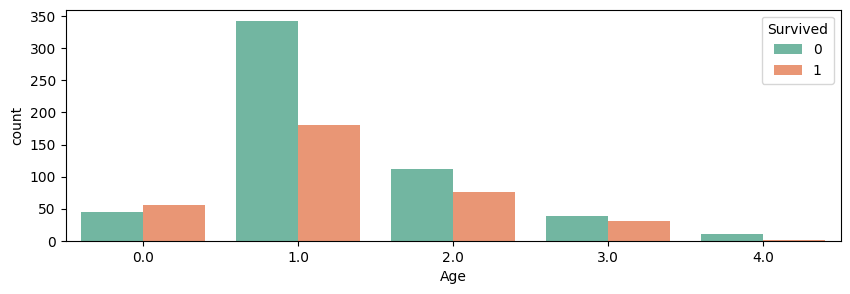

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
sns.countplot(x='Age', hue='Survived', data=train, palette='Set2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def rate(col):
    group = train.groupby(col).size() #train['Age].value_counts()
    df_total = group.to_frame("전체")
    group = train[train['Survived']==1][col].value_counts()
    df_survived = group.to_frame("생존")
    df_survived
    join = df_total.join(df_survived)
    join['사망'] = join['전체']-join['생존']
    join['생존율'] = join['생존']/join['전체']
    return join

In [117]:
df = rate('Age')
df

,전체,생존,사망,생존율
Age,,,,
0.0,100,55,45,0.550000
1.0,523,180,343,0.344168
2.0,188,76,112,0.404255
3.0,69,30,39,0.434783
4.0,11,1,10,0.090909


In [119]:
df_train=pd.read_csv('data/타이타닉/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
df_train['AgeRange'] = pd.cut(df_train['Age'],5)
range = df_train['AgeRange'].value_counts()
range = pd.Series(range)
ranges = range.sort_index().index
index = []
for range in ranges:
    range = str(range).replace('(','').replace(']','').split(',')
    range = f'{float(range[0]):.0f}~{float(range[1]):.0f}'
    # print(range)
    index.append(range)
index

['0~16', '16~32', '32~48', '48~64', '64~80']

In [147]:
df = rate('Age')
df = df.sort_index()
df.index = index
df

,전체,생존,사망,생존율
0~16,100,55,45,0.550000
16~32,523,180,343,0.344168
32~48,188,76,112,0.404255
48~64,69,30,39,0.434783
64~80,11,1,10,0.090909


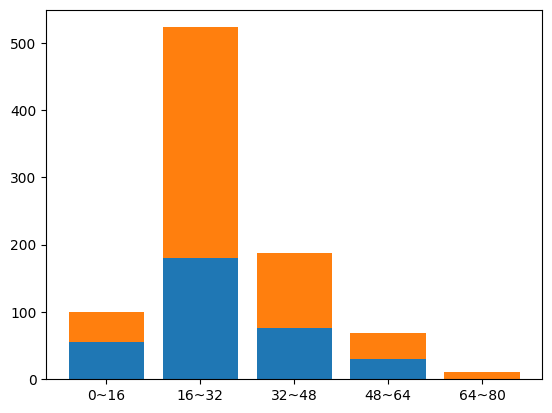

In [152]:
xticks = df.index
plt.bar(df.index, df['생존'])
plt.bar(df.index, df['사망'], bottom=df['생존'])
plt.show()